<a href="https://colab.research.google.com/github/JMML2021/Tasca-M6-T01-ML_regressions-/blob/main/Sprint_6_Algoritmes_d%E2%80%99aprenentatge_supervisat_Regressi%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [32]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Abro el fichero

#path='https://drive.google.com/file/d/1j8WdhTxMpngrUigfcfrJynng-9JHo9xa/view?usp=sharing'
path = ('/content/drive/MyDrive/01_COLAB/housing data.csv')
#data = pd.read_csv(file,
    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]
#df1.dtypes

Hay  505 filas con 14 columnas

Imprimo el primer registro, solo para ver como es:



0.00632      0.02731
18.00        0.00000
2.310        7.07000
0            0.00000
0.5380       0.46900
6.5750       6.42100
65.20       78.90000
4.0900       4.96710
1            2.00000
296.0      242.00000
15.30       17.80000
396.90     396.90000
4.98         9.14000
24.00       21.60000
Name: 0, dtype: float64

In [5]:
# Asigno una lista con los nombres de las columnas
Nombre_Columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df1.columns = [Nombre_Columnas]
df1.iloc[0]



CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
MEDV        21.60000
Name: 0, dtype: float64

To know more about the features use boston_dataset.**DESCR The description of all the features is given below:**

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
df3=boston

In [7]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
from sklearn.model_selection import train_test_split   
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' ]
 
x = df1.loc[:, features]
y = df1.loc[:, ['MEDV']]
    
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape  :  (101, 13)
ytrain shape :  (404, 1)
ytest shape  :  (101, 1)


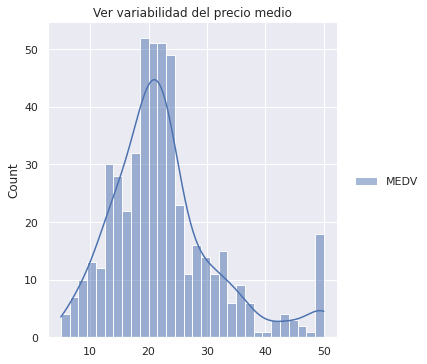

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(y, bins=30, kde = True)
plt.title('Ver variabilidad del precio medio')
plt.show()

**VERDE **
l


ttps://www.kaggle.com/code/deuterium06/boston-housing-linear-regression/notebook

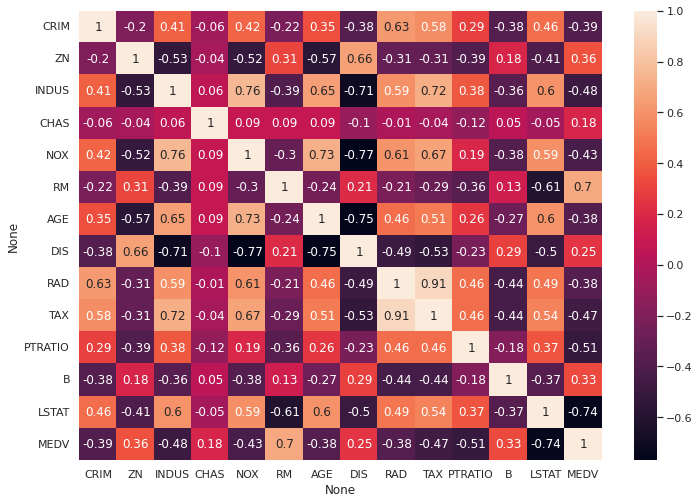

In [11]:
correlation_matrix = df1.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
type(boston)
#c = boston.corr().abs().nlargest(4, 'LSTAT')
boston.describe()
boston.dtypes
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [13]:
#
c
boston.shape
df4= np.array(df1)
df5=pd.DataFrame(df4)
df6=df1
df6.MEDV = df6.MEDV.astype('float')
c = df3.corr().abs().nlargest(7, 'LSTAT')
c
#print(f"dtype of array is: {boston.dtype}")

NameError: ignored

In [ ]:
df3= df1.to_numpy()
df3=pd.DataFrame(df1)
#d= pd.DataFrame(3,'MDEV')
c = boston.corr().abs().nlargest(4, 'LSTAT')
c
#df3 = np.array(df1, dtype=np.float32)
#c = df1.corr().abs().nlargest(5, 'MEDV')
 
#s = c.unstack()
#so = s.sort_values(kind="quicksort")
print (c)

In [ ]:
#type(df1)
#df1.head()
#c
df3=pd.DataFrame(df1)
df3.dtypes

In [ ]:
columns_sorted = df1.corr().abs().nlargest(14, 'MEDV').index
correlation_sorted = np.corrcoef(df1[columns_sorted].values.T)

f, ax = plt.subplots(figsize = (9,7.5))
hm = sns.heatmap(abs(correlation_sorted), annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns_sorted.values, xticklabels=columns_sorted.values, cmap='summer')
plt.show()

In [ ]:
df2= pd.DataFrame(df1)
sns.boxplot(df2['RAD'], df2['MEDV'])

In [ ]:
df1['MEDV'],

In [ ]:
#sns.boxplot(df1['RAD'], df1['MEDV'])
#sns.catplot( x= 'RAD', y = 'MEDV', data = df1, kind = "box")
df1

**Observaciones:**
Para ajustar un modelo de regresión lineal, seleccionamos aquellas características que tienen una alta correlación con nuestra variable objetivo MEDV. Al observar la matriz de correlación, podemos ver que RM tiene una fuerte correlación positiva con MEDV (0,7), mientras que LSTAT tiene una alta correlación negativa con MEDV (-0,74).

Un punto importante en la selección de características para un modelo de regresión lineal es comprobar la multicolinealidad. Las características RAD, TAX tienen una correlación de 0,91. Estos pares de características están fuertemente correlacionados entre sí. No debemos seleccionar ambas características juntas para entrenar el modelo. Compruebe esto para obtener una explicación. Lo mismo ocurre con las funciones DIS y AGE, que tienen una correlación de -0,75.

En base a las observaciones anteriores, utilizaremos RM y LSTAT como nuestras características. Usando un gráfico de dispersión, veamos cómo varían estas características con MEDV.

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df1['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df1[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Observaciones:**
Los precios aumentan a medida que el valor de RM aumenta linealmente. Hay pocos valores atípicos y los datos parecen tener un límite de 50.
Los precios tienden a disminuir con un aumento en LSTAT. Aunque no parece estar siguiendo exactamente una línea lineal.

In [ ]:
X = pd.DataFrame(np.c_[df1['LSTAT'], df1['RM']], columns = ['LSTAT','RM'])
Y = df1['MEDV']

In [ ]:
#from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

In [ ]:
# model evaluation for training set

from sklearn.metrics import r2_score

y_train_predict = lin_model.predict(X_train)
rmse = round((np.sqrt(mean_squared_error(Y_train, y_train_predict))),2)
r2 = round(r2_score(Y_train, y_train_predict),2)

print("El modelo para el dataset de training da: ")
print("--------------------------------------")
print('error cuadrático medio (RMSE) es {}'.format(rmse))
print('R2 score es {}'.format(r2))
print("\n")

# Evaluacion del modelo de set
y_test_predict = lin_model.predict(X_test)
rmse = round((np.sqrt(mean_squared_error(Y_test, y_test_predict))),2)
r2 = round(r2_score(Y_test, y_test_predict),2)

print("el modelo para el dataset de Test da")
print("--------------------------------------")
print('error cuadrático medio (RMSE) es {}'.format(rmse))
print('R2 El valor es {}'.format(r2))

In [ ]:
import pandas.util.testing as tm


In [ ]:
X = df1["RM"]
y = target["MEDV"]

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

# Note the difference in argument order
model = RollingOLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
window = 1000
a = np.array([np.nan] * len(df))
b = [np.nan] * len(df)  # If betas required.
#y_ = df.y.values
y_ = target["MEDV"]
#x_ = df[['x']].assign(constant=1).values
x_ = df1["RM"]
for n in range(window, len(df)):
    y = y_[(n - window):n]
    X = x_[(n - window):n]
    # betas = Inverse(X'.X).X'.y
    betas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    y_hat = betas.dot(x_[n, :])
    a[n] = y_hat
    b[n] = betas.tolist()  # If betas required.

https://nsamrao.github.io/Boston_Housing/

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
bos1 = df1
bos1['CRIM'] = np.log(bos1['CRIM'])

In [ ]:
m = ols('PRICE ~ PTRATIO + NOX + RM + LSTAT + DIS ',bos1).fit()
print(m.summary())

In [ ]:
Nombre_Columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [ ]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below

X = df1["RM"]
y = target["MEDV"]
m = ols(y,X).fit()
print(m.summary())

In [ ]:
  import pandas.util.testing as tm
  data = pd.DataFrame({"y": target["MEDV"], "x": df1["RM"]}, index=[5, 3, 1])
  results = ols('y ~ x', data).fit()

FOREST

In [ ]:
X = pd.DataFrame(np.c_[df1['LSTAT'], df1['RM']], columns = ['LSTAT','RM'])
Y = df1['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

feats = ['LSTAT', 'RM']
m = RandomForestRegressor(n_jobs = -1, oob_score = True)
m.fit(X_train, Y_train)
print('m: ', m)
feat_imps = m.feature_importances_

print(' feat_imps', feat_imps)

score = round(m.score(X_train, Y_train),2)
print('Score: ', score)

ypredict = (m.predict(X_test))
Y_test=Y_test.to_numpy()

type(ypredict)
type(Y_test)
mae = np.mean(np.absolute(Y_test - ypredict))
#mae= np.absolute (Y_test - ypredict)
#mae_percent = np.mean(np.absolute(ytest - ypredict) / ytest)

 clf = RandomForestRegressor()
    clf.fit(xtrain, ytrain)

    score = clf.score(xtest, ytest)

    feat_imps = clf.feature_importances_

    ypredict = clf.predict(xtest)


    mae = np.mean(np.absolute(ytest - ypredict))
    mae_percent = np.mean(np.absolute(ytest - ypredict) / ytest)
    return (
      
        "R^2 is ",
        score,
        "MAE is ",
        mae,
        "MAE percent is ",
        mae_percent,
        "Feature Importances are ",
        zip(feature_names, feat_imps),

**Fitting Linear Regression using statsmodels**


https://github.com/shashankvmaiya/Boston-Housing-Price-Prediction/blob/master/Mini_Project_Linear_Regression.ipynb


**RESIDUOS:**


https://colab.research.google.com/github/RPI-DATA/course-intro-ml-app/blob/master/content/notebooks/12-intro-modeling-2/02-regression-boston-housing-python.ipynb

# Multiple Linear Regression

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [14]:
X = pd.DataFrame(np.c_[df1['LSTAT'], df1['RM']], columns = ['LSTAT','RM'])
Y = df1['MEDV']

#from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 2)
(101, 2)
(404, 1)
(101, 1)


In [19]:
## Without a constant

import statsmodels.api as sm

#X = df1[["RM", 'LSTAT']]
#y = target["MEDV"]

# Note the difference in argument order
modelo = sm.OLS(Y_train, X_train).fit()

predictions = modelo.predict(X_test) # make the predictions by the model

# Print out the statistics
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              3541.
Date:                Sat, 23 Jul 2022   Prob (F-statistic):                   5.64e-256
Time:                        05:40:38   Log-Likelihood:                         -1279.4
No. Observations:                 404   AIC:                                      2563.
Df Residuals:                     402   BIC:                                      2571.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

interpretación de la salida: 

podemos ver aquí que este modelo tiene un valor de $R^{2}$ alto: 0,948, lo que significa que este modelo explica el 94,8 % de la varianza de nuestra variable dependiente. 

Podemos ver que tanto RM como LSTAT son estadísticamente significativos para predecir (o estimar) el valor medio de la casa; Vemos que a medida que RM aumenta en 1, MEDV aumentará en 4,9069 y cuando LSTAT aumente en 1, MEDV disminuirá en -0,6557. 

LSTAT es el porcentaje de estatus más bajo de la población y, lamentablemente, podemos esperar que reduzca el valor medio de las casas. Con esta misma lógica, cuantas más habitaciones tenga una casa, normalmente mayor será su valor.

# Estudio Residuos de MLR

**Normality of the residuals**


https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html?highlight=residual

In [20]:
import statsmodels.stats.api as sms
 
from statsmodels.compat import lzip 

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(modelo.resid)
print('estudio de los residuos por su estadisticos:')
lzip(name, test)
#print(\ntest)

estudio de los residuos por su estadisticos:


[('Jarque-Bera', 311.33555096077407),
 ('Chi^2 two-tail prob.', 2.479385738002033e-68),
 ('Skew', 1.2851183542114206),
 ('Kurtosis', 6.448052277427101)]

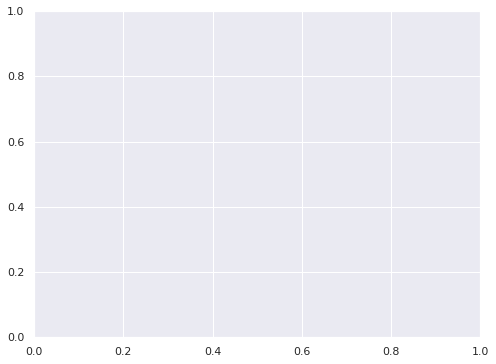

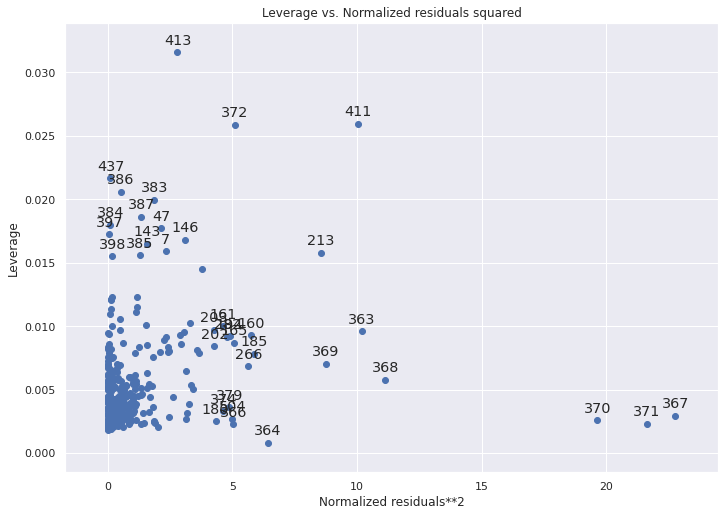

In [21]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(modelo, ax=ax)

# Error de test MLR

In [42]:
# Error de test del modelo 
# ==============================================================================
from sklearn.metrics import mean_squared_error

X_test1 = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(X_test)
rmse = mean_squared_error(
        y_true  = Y_test,
        y_pred  = predicciones,
        squared = False
       )
rmse=round(rmse,2)
print("")
print(f"El error (rmse) de test es: {rmse}")
print()


El error (rmse) de test es: 4.61



## Diagnóstico de los resíduos


https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

In [49]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
Y_train = Y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - Y_train

El error de test del modelo es de 4.606. Las predicciones del modelo final se alejan en promedio 4.606 unidades del valor real.

## Analisis gráfico de los residuos de MLR creado

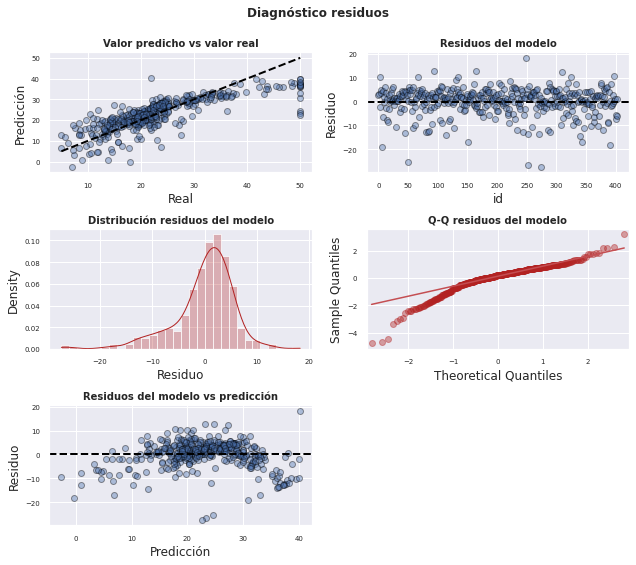

In [45]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(Y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(Y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [46]:
# Subrutina Gráficos de los residuos
# ==============================================================================


def analisisGraficoResiduos(Y_train, prediccion_train):
  
  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

  axes[0, 0].scatter(Y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
  axes[0, 0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()],
                  'k--', color = 'black', lw=2)
  axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
  axes[0, 0].set_xlabel('Real')
  axes[0, 0].set_ylabel('Predicción')
  axes[0, 0].tick_params(labelsize = 7)

  axes[0, 1].scatter(list(range(len(Y_train))), residuos_train,
                    edgecolors=(0, 0, 0), alpha = 0.4)
  axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
  axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
  axes[0, 1].set_xlabel('id')
  axes[0, 1].set_ylabel('Residuo')
  axes[0, 1].tick_params(labelsize = 7)

  sns.histplot(
      data    = residuos_train,
      stat    = "density",
      kde     = True,
      line_kws= {'linewidth': 1},
      color   = "firebrick",
      alpha   = 0.3,
      ax      = axes[1, 0]
  )

  axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                      fontweight = "bold")
  axes[1, 0].set_xlabel("Residuo")
  axes[1, 0].tick_params(labelsize = 7)


  sm.qqplot(
      residuos_train,
      fit   = True,
      line  = 'q',
      ax    = axes[1, 1], 
      color = 'firebrick',
      alpha = 0.4,
      lw    = 2
  )
  axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
  axes[1, 1].tick_params(labelsize = 7)

  axes[2, 0].scatter(prediccion_train, residuos_train,
                    edgecolors=(0, 0, 0), alpha = 0.4)
  axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
  axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
  axes[2, 0].set_xlabel('Predicción')
  axes[2, 0].set_ylabel('Residuo')
  axes[2, 0].tick_params(labelsize = 7)

  # Se eliminan los axes vacíos
  fig.delaxes(axes[2,1])

  fig.tight_layout()
  plt.subplots_adjust(top=0.9)
  fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

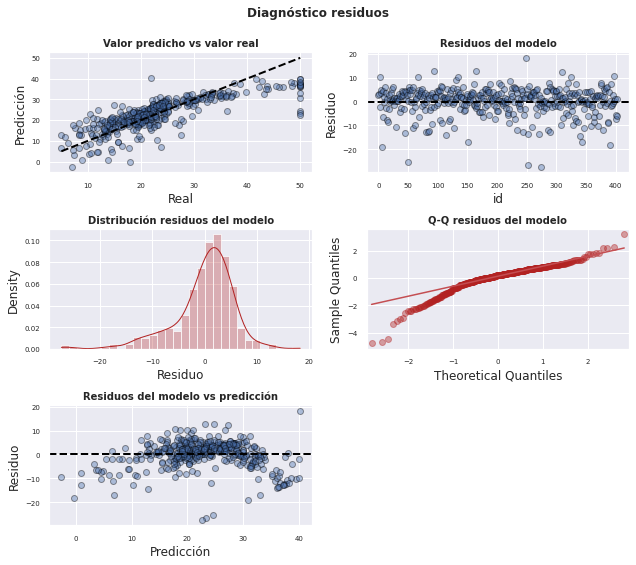

In [47]:
# LLamo a la subrutina de grafico de los residuos

analisisGraficoResiduos(Y_train, prediccion_train)

Explicacion de lo que se ve en los gráficos

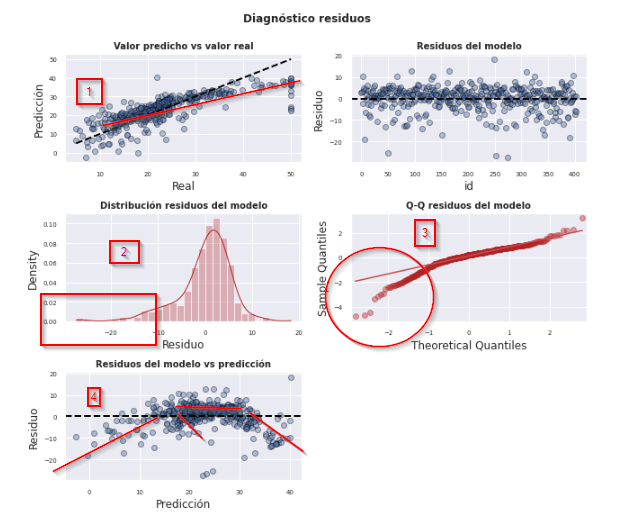

**Comentarios:**
1.- La aproximacion de la recta de residuos vemos que tiene una deriva de 15º

2.- En la parte inferior, para valores pequeños, es donde tenemos mas error.

3.- Vemos el mismo comportamiento del residuo que en el gráfico 2

4.- En el gráfico Residuo del modelo vs predicción veo un comportamiento cuadradico o de rango superior

In [51]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================

from scipy import stats

shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9111231565475464, pvalue=1.1496883225168078e-14)

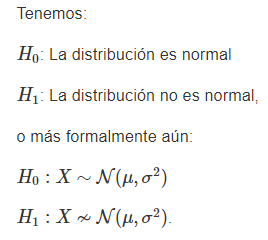

Comclusion: No es normal

# Información de sesión

In [53]:
#!pip install sinfo
from sinfo import sinfo
sinfo()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=660c688d515c40eb9ee98df7231c57b609914e7883c61026c2a7a13c3ecd78a1
  Stored in directory: /root/.cache/pip/wheels/68/ca/56/344d532fe53e855ccd6549795d370588ab8123907eecf4cf30
Successfully built sinfo
The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
google      NA
matplotlib  3.2.2
numpy       1.21.6
pandas      1.3.5
scipy